# Scalar Example 2 (Public Debt Stabilization)

## Parameter Initialization:

In [1]:
using Ipopt, JuMP, LinearAlgebra, PyPlot, Statistics

Kf = 30

Q₁ = 0.4 # denoted as λ in the literatuture 
Q₂ = 0.5 # denoted as Κ in the literatuture 

R₁ = 1
R₂ = 1


A = 1.05  # 1 + r, where r = 0.05    
B₁ = 1
B₂ = -1

C = [Q₁*B₁ ; Q₂*B₂]

Mbr = [(Q₁*B₁^2 + R₁) Q₁*B₁*B₂; Q₂*B₁*B₂ (Q₂*B₂^2 + R₂)]

Mj = [(Q₁*B₁^2 + R₁) 0; 0 (Q₂*B₂^2 + R₂)]

Mgs = [(Q₁*B₁^2 + R₁) 0; Q₂*B₁*B₂ (Q₂*B₂^2 + R₂)]

Nj = [0 Q₁*B₁*B₂; Q₂*B₁*B₂ 0]

Ngs = [0 Q₁*B₁*B₂; 0 0]

Lbr = - inv(Mbr)*C

Kbr = Lbr*A

Lj = - inv(Mj)*C

Kj = Lj*A

Lgs = - inv(Mgs)*C

Kgs = Lgs*A

x_init = 1 #previously denoted as d₀ (state was referred as d) 
x_ref = 0.1; #previously denoted as cd

## Convergence Condition:

In [2]:
A_br = A + B₁*Kbr[1] + B₂*Kbr[2]

A_jac = A + B₁*Kj[1] + B₂*Kj[2]

A_gs = A + B₁*Kgs[1] + B₂*Kgs[2]

# Convergence Condition: Best Response
SR_br = maximum(abs.(eigvals(A_br)))

if SR_br <= 1
    br_check = true
else
    br_check = false
end

# Convergence Condition: Jacobi
SR_jac = maximum(abs.(eigvals(A_jac)))

if SR_jac <= 1
    jac_check = true
else
    jac_check = false
end

# Convergence Condition: Gauss-Seidel
SR_gs = maximum(abs.(eigvals(A_gs))) 

if SR_gs <= 1
    gs_check = true
else
    gs_check = false
end

println("Best Response:")
println("Convergence check is ", br_check)
println("ρ(Abr) = ", round(SR_br, digits=6), "\n")

println("Jacobi Game:")
println("Convergence check is ", jac_check)
println("ρ(Aj) = ", round(SR_jac, digits=6), "\n")

println("Gauss-Seidel Game:")
println("Convergence check is ", gs_check)
println("ρ(Ags) = ", round(SR_gs, digits=6), "\n")

Best Response:
Convergence check is true
ρ(Abr) = 0.552632

Jacobi Game:
Convergence check is true
ρ(Aj) = 0.4

Gauss-Seidel Game:
Convergence check is true
ρ(Ags) = 0.5



## Best Response Simulation:

In [3]:
x_br = zeros(Kf+1)
x_br[1] = x_init

u_br = zeros(2,Kf)

J1_br = Q₁*(x_br[1] - x_ref)^2 
J2_br = Q₂*(x_br[1] - x_ref)^2 

for k in 1:Kf
    u_br[:,k] = Kbr*x_br[k] - Lbr*x_ref

    #Simulated Dynamics
    x_br[k+1] = A*x_br[k] + B₁*u_br[1,k] + B₂*u_br[2,k]

    #Accumulated Objective For Player 1
    J1_br += Q₁*(x_br[k+1] - x_ref)^2 + R₁*u_br[1,k]^2
    
    #Accumulated Objective For Player 2
    J2_br += Q₂*(x_br[k+1] - x_ref)^2 + R₂*u_br[2,k]^2
end
    
println("Evolution of the states, x = ", round.(x_br, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_br[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_br[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_br, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_br, digits=4)) 

Evolution of the states, x = [1.0, 0.6, 0.3789, 0.2568, 0.1893, 0.152, 0.1314, 0.12, 0.1137, 0.1102, 0.1083, 0.1072, 0.1066, 0.1063, 0.1061, 0.106, 0.106, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059]

Evolution of the control input of Player 1, u₁ = [-0.2, -0.1116, -0.0627, -0.0357, -0.0208, -0.0125, -0.008, -0.0055, -0.0041, -0.0033, -0.0029, -0.0026, -0.0025, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024]

Evolution of the control input of Player 2, u₂ = [0.25, 0.1395, 0.0784, 0.0446, 0.026, 0.0157, 0.01, 0.0068, 0.0051, 0.0041, 0.0036, 0.0033, 0.0031, 0.0031, 0.003, 0.003, 0.003, 0.003, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029]

Accumulated Objective (Player 1), J₁(Kf) = 0.5287

Accumulated Objective (Player 2), J₂(Kf) = 0.6792


## Jacobi Simulation:

In [4]:
x_jac = zeros(Kf+1)
x_jac[1] = x_init

u_jac = zeros(2,Kf)

J1_jac = Q₁*(x_jac[1] - x_ref)^2 
J2_jac = Q₂*(x_jac[1] - x_ref)^2 

Ztrans = -inv(Mj)*Nj

u_old = zeros(2)

for k in 1:Kf
    u_jac[:,k] = Ztrans*u_old +  Kj*x_jac[k] - Lj*x_ref

    u_old = u_jac[:,k]
    
    #Simulated Dynamics
    x_jac[k+1] = A*x_jac[k] + B₁*u_jac[1,k] + B₂*u_jac[2,k]

    #Accumulated Objective For Player 1
    J1_jac += Q₁*(x_jac[k+1] - x_ref)^2 + R₁*u_jac[1,k]^2
    
    #Accumulated Objective For Player 2
    J2_jac += Q₂*(x_jac[k+1] - x_ref)^2 + R₂*u_jac[2,k]^2
end
    
println("Evolution of the states, x = ", round.(x_jac, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_jac[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_jac[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_jac, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_jac, digits=4)) 

Evolution of the states, x = [1.0, 0.4619, 0.4276, 0.2503, 0.223, 0.1632, 0.149, 0.1283, 0.1218, 0.1146, 0.1118, 0.1092, 0.1081, 0.1072, 0.1067, 0.1064, 0.1062, 0.1061, 0.106, 0.106, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059]

Evolution of the control input of Player 1, u₁ = [-0.2714, -0.0195, -0.0889, -0.0151, -0.0313, -0.0091, -0.0123, -0.0054, -0.0058, -0.0037, -0.0036, -0.0029, -0.0028, -0.0026, -0.0025, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024]

Evolution of the control input of Player 2, u₂ = [0.3167, 0.0379, 0.1098, 0.0246, 0.0397, 0.0134, 0.0158, 0.0075, 0.0075, 0.0048, 0.0046, 0.0037, 0.0035, 0.0032, 0.0032, 0.0031, 0.003, 0.003, 0.003, 0.003, 0.003, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029]

Accumulated Objective (Player 1), J₁(Kf) = 0.5215

Accumulated Objective (Player 2), J₂(Kf) = 0.6641


## Jacobi (QP Problem) - Algorithm 1:

In [5]:
#Initialize arrays
x = zeros(Kf+1) 
x[1] = x_init 

u_osa = zeros(2,Kf) 

u_old = zeros(2)

J1 = Q₁*(x[1] - x_ref)^2 
J2 = Q₂*(x[1] - x_ref)^2 

for k in 1:Kf
    #########
    #Player 1
    
    mP1 = Model(Ipopt.Optimizer)
    set_silent(mP1)
    @variable(mP1, u₁) #control input of the Player 1
    @variable(mP1, xn) #next state
  
    #Dynamical constraint
    @constraint(mP1, xn == A*x[k] + B₁*u₁ + B₂*u_old[2])
    
    #Objective Function
    @objective(mP1, Min, Q₁*(xn - x_ref)^2 + R₁*u₁^2 ) 
    
    optimize!(mP1)
    
    #########
    #Player 2
    
    mP2 = Model(Ipopt.Optimizer)
    set_silent(mP2)
    @variable(mP2, u₂) #control input of the Player 2
    @variable(mP2, xn) #next state 
  
    #Dynamical constraint
    @constraint(mP2, xn == A*x[k] + B₁*u_old[1] + B₂*u₂)
    
    #Monetary Objective Function 
    @objective(mP2, Min, Q₂*(xn - x_ref)^2 + R₂*u₂^2 )
    
    optimize!(mP2)
    
    ########
    #Updates
    
    u_osa[1,k] = JuMP.value.(mP1[:u₁])
    u_osa[2,k] = JuMP.value.(mP2[:u₂])
    
    u_old = u_osa[:,k]
    
    #State simulation
    x[k+1] = A*x[k] + B₁*u_osa[1,k] + B₂*u_osa[2,k] 
    
    #Accumulated Objective For Player 1
    J1 += Q₁*(x[k+1] - x_ref)^2 + R₁*u_osa[1,k]^2
    
    #Accumulated Objective For Player 2
    J2 += Q₂*(x[k+1] - x_ref)^2 + R₂*u_osa[2,k]^2
end

u_jac = u_osa
x_jac = x
J1_jac = J1
J2_jac = J2

println("Evolution of the states, x = ", round.(x_jac, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_jac[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_jac[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_jac, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_jac, digits=4))


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Evolution of the states, x = [1.0, 0.4619, 0.4276, 0.2503, 0.223, 0.1632, 0.149, 0.1283, 0.1218, 0.1146, 0.1118, 0.1092, 0.1081, 0.1072, 0.1067, 0.1064, 0.1062, 0.1061, 0.106, 0.106, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059]

Evolution of the control input of Player 1, u₁ = [-0.2714, -0.0195, -0.0889, -0.0151, -0.0313, -0.0091, -0.0123, -0.0054, -0.0058, -0.0037, -0.0036, -0.0029, -0.0028, -0.0026, -0.0025, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024]

Evolution of the con

## Gauss-Seidel Simulation:

In [6]:
x_gs = zeros(Kf+1)
x_gs[1] = x_init

u_gs = zeros(2,Kf)

J1_gs = Q₁*(x_gs[1] - x_ref)^2 
J2_gs = Q₂*(x_gs[1] - x_ref)^2 

Ztrans = -inv(Mgs)*Ngs

u_old = zeros(2)

for k in 1:Kf
    u_gs[:,k] = Ztrans*u_old +  Kgs*x_gs[k] - Lgs*x_ref

    u_old = u_gs[:,k]
    
    #Simulated Dynamics
    x_gs[k+1] = A*x_gs[k] + B₁*u_gs[1,k] + B₂*u_gs[2,k]

    #Accumulated Objective For Player 1
    J1_gs += Q₁*(x_gs[k+1] - x_ref)^2 + R₁*u_gs[1,k]^2
    
    #Accumulated Objective For Player 2
    J2_gs += Q₂*(x_gs[k+1] - x_ref)^2 + R₂*u_gs[2,k]^2
end
    
println("Evolution of the states, x = ", round.(x_gs, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_gs[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_gs[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_gs, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_gs, digits=4)) 

Evolution of the states, x = [1.0, 0.5524, 0.3717, 0.2641, 0.2, 0.1619, 0.1392, 0.1257, 0.1177, 0.1129, 0.1101, 0.1084, 0.1074, 0.1068, 0.1064, 0.1062, 0.1061, 0.106, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059]

Evolution of the control input of Player 1, u₁ = [-0.2714, -0.0725, -0.0441, -0.0272, -0.0172, -0.0112, -0.0076, -0.0055, -0.0042, -0.0035, -0.003, -0.0027, -0.0026, -0.0025, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024]

Evolution of the control input of Player 2, u₂ = [0.2262, 0.1358, 0.082, 0.05, 0.031, 0.0196, 0.0129, 0.0089, 0.0065, 0.005, 0.0042, 0.0037, 0.0034, 0.0032, 0.0031, 0.003, 0.003, 0.003, 0.003, 0.003, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029]

Accumulated Objective (Player 1), J₁(Kf) = 0.5354

Accumulated Objective (Player 2), J₂(Kf) = 0.6471


## Gauss-Seidel (QP Problem) - Algorithm 2:

In [7]:
#Initialize arrays
x = zeros(Kf+1) 
x[1] = x_init 

u_osa = zeros(2,Kf)

u_old = zeros(2)

J1 = Q₁*(x[1] - x_ref)^2 
J2 = Q₂*(x[1] - x_ref)^2 

for k in 1:Kf
    #########
    #Player 1
    
    mP1 = Model(Ipopt.Optimizer)
    set_silent(mP1)
    @variable(mP1, u₁) #control input of Player 1
    @variable(mP1, xn) #next state
   
    #Dynamical constraint
    @constraint(mP1, xn == A*x[k] + B₁*u₁ + B₂*u_old[2])
    
    #Objective Function
    @objective(mP1, Min, Q₁*(xn - x_ref)^2 + R₁*u₁^2 ) 
    
    optimize!(mP1)

    #################
    #Player 1 updates
    u_osa[1,k] = JuMP.value.(mP1[:u₁])
    u_old[1] = u_osa[1,k]
    
    #########
    #Player 2
    
    mP2 = Model(Ipopt.Optimizer)
    set_silent(mP2)
    @variable(mP2, u₂) #control input of Player 2
    @variable(mP2, xn) #next state
    
    #Dynamical constraint
    @constraint(mP2, xn == A*x[k] + B₁*u_old[1] + B₂*u₂)
    
    #Monetary Objective Function 
    @objective(mP2, Min, Q₂*(xn - x_ref)^2 + R₂*u₂^2 )
    
    optimize!(mP2)
    
    #################
    #Player 2 updates
    u_osa[2,k] = JuMP.value.(mP2[:u₂])
    u_old[2] = u_osa[2,k]

    #############
    #State update
    x[k+1] = JuMP.value.(mP2[:xn])

    #############
  
    #Accumulated Objective For Player 1
    J1 += Q₁*(x[k+1] - x_ref)^2 + R₁*u_osa[1,k]^2
    
    #Accumulated Objective For Player 2
    J2 += Q₂*(x[k+1] - x_ref)^2 + R₂*u_osa[2,k]^2
end

u_gs = u_osa
x_gs = x
J1_gs = J1
J2_gs = J2

println("Evolution of the states, x = ", round.(x_gs, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_gs[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_gs[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_gs, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_gs, digits=4))

Evolution of the states, x = [1.0, 0.5524, 0.3717, 0.2641, 0.2, 0.1619, 0.1392, 0.1257, 0.1177, 0.1129, 0.1101, 0.1084, 0.1074, 0.1068, 0.1064, 0.1062, 0.1061, 0.106, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059, 0.1059]

Evolution of the control input of Player 1, u₁ = [-0.2714, -0.0725, -0.0441, -0.0272, -0.0172, -0.0112, -0.0076, -0.0055, -0.0042, -0.0035, -0.003, -0.0027, -0.0026, -0.0025, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024, -0.0024]

Evolution of the control input of Player 2, u₂ = [0.2262, 0.1358, 0.082, 0.05, 0.031, 0.0196, 0.0129, 0.0089, 0.0065, 0.005, 0.0042, 0.0037, 0.0034, 0.0032, 0.0031, 0.003, 0.003, 0.003, 0.003, 0.003, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029]

Accumulated Objective (Player 1), J₁(Kf) = 0.5354

Accumulated Objective (Player 2), J₂(Kf) = 0.6471


## Comparison Plots:

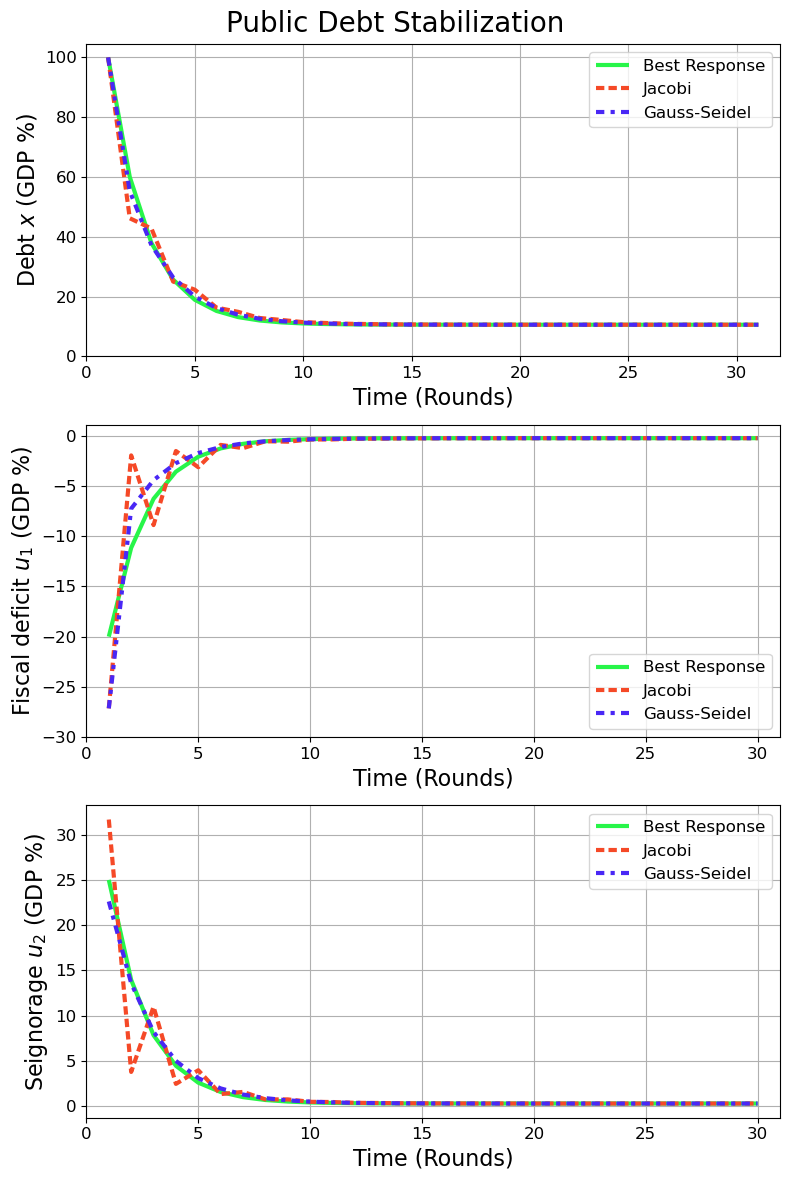

In [8]:
PyPlot.svg(true)

save_files = false #true - save all figures and data / false - do not save

t1 = Array(1:1:Kf+1)
t2 = Array(1:1:Kf)

figure(figsize=(8,12))
subplot(3,1,1)
grid()
plot(t1,100*x_br, linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t1,100*x_jac, linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t1,100*x_gs, linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Best Response", "Jacobi", "Gauss-Seidel"],loc="best", fontsize=12)
ylabel("Debt \$x\$ (GDP %)", fontsize=16)
xlabel("Time (Rounds)", fontsize=16)
xlim(0,Kf+2)
yticks(Array(0:20:100), fontsize=12)
xticks(Array(0:5:Kf), fontsize=12)

subplot(3,1,2)
grid()
plot(t2,100*u_br[1,:], linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t2,100*u_jac[1,:], linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t2,100*u_gs[1,:], linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Best Response", "Jacobi", "Gauss-Seidel"],loc="lower right", fontsize=12)
ylabel("Fiscal deficit \$u_1\$ (GDP %)",fontsize=16)
xlabel("Time (Rounds)",fontsize=16)
xlim(0,Kf+1)
yticks(Array(-30:5:0), fontsize=12)
xticks(Array(0:5:Kf), fontsize=12)

subplot(3,1,3)
grid()
plot(t2,100*u_br[2,:], linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t2,100*u_jac[2,:], linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t2,100*u_gs[2,:], linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Best Response", "Jacobi", "Gauss-Seidel"],loc="best", fontsize=12)
ylabel("Seignorage \$u_2\$ (GDP %)", fontsize=16)
xlabel("Time (Rounds)", fontsize=16)
xlim(0,Kf+1)
yticks(Array(0:5:30), fontsize=12)
xticks(Array(0:5:Kf), fontsize=12)

suptitle("Public Debt Stabilization",fontsize=20)
tight_layout() #avoid the overlap of subplots

if save_files
    savefig("scalar_ex_2.eps", bbox_inches="tight")
end

## Deviation from Best Response:

In [9]:
x_mean = abs(mean(x_br))
u1_mean = abs(mean(u_br[1,:]))
u2_mean = abs(mean(u_br[2,:]))

RMSE_state_jac = sqrt((1/(Kf+1))*sum((x_jac - x_br).^2))
RMSE_u1_jac = sqrt((1/Kf)*sum((u_jac[1,:] - u_br[1,:]).^2))
RMSE_u2_jac = sqrt((1/Kf)*sum((u_jac[2,:] - u_br[2,:]).^2))

CV_state_jac = RMSE_state_jac/x_mean
CV_u1_jac = RMSE_u1_jac/u1_mean
CV_u2_jac = RMSE_u2_jac/u2_mean

println("Jacobi Game:")
println("Deviation (State) = ", round(CV_state_jac, digits=8))
println("Deviation (Player 1) = ", round(CV_u1_jac, digits=8))
println("Deviation (Player 2) = ", round(CV_u2_jac, digits=8), "\n")

RMSE_state_gs = sqrt((1/(Kf+1))*sum((x_gs - x_br).^2))
RMSE_u1_gs = sqrt((1/Kf)*sum((u_gs[1,:] - u_br[1,:]).^2))
RMSE_u2_gs = sqrt((1/Kf)*sum((u_gs[2,:] - u_br[2,:]).^2))

CV_state_gs = RMSE_state_gs/x_mean
CV_u1_gs = RMSE_u1_gs/u1_mean
CV_u2_gs = RMSE_u2_gs/u2_mean

println("Gauss-Seidel Game:")
println("Deviation (State) = ", round(CV_state_gs, digits=8))
println("Deviation (Player 1) = ", round(CV_u1_gs, digits=8))
println("Deviation (Player 2) = ", round(CV_u2_gs, digits=8))

Jacobi Game:
Deviation (State) = 0.16070287
Deviation (Player 1) = 1.30178657
Deviation (Player 2) = 1.09493285

Gauss-Seidel Game:
Deviation (State) = 0.05493055
Deviation (Player 1) = 0.89826612
Deviation (Player 2) = 0.2227762


## Constrained Control Input:

In [10]:
u1_min = 0.02
u2_min = 0
u1_max = 0.15
u2_max = 0.15;

## Best Response Simulation (With Saturation): 

In [11]:
x_br = zeros(Kf+1)
x_br[1] = x_init

u_br = zeros(2,Kf)

J1_br = Q₁*(x_br[1] - x_ref)^2 
J2_br = Q₂*(x_br[1] - x_ref)^2 

for k in 1:Kf
    u_br[:,k] = Kbr*x_br[k] - Lbr*x_ref
    
    #Enforcing box constraints 
    if u_br[1,k] < u1_min
        u_br[1,k] = u1_min
    elseif u_br[1,k] > u1_max
        u_br[1,k] = u1_max
    end

    if u_br[2,k] < u2_min
        u_br[2,k] = u2_min
    elseif u_br[2,k] > u2_max
        u_br[2,k] = u2_max
    end
    
    #Simulated Dynamics
    x_br[k+1] = A*x_br[k] + B₁*u_br[1,k] + B₂*u_br[2,k]

    #Accumulated Objective For Player 1
    J1_br += Q₁*(x_br[k+1] - x_ref)^2 + R₁*u_br[1,k]^2
    
    #Accumulated Objective For Player 2
    J2_br += Q₂*(x_br[k+1] - x_ref)^2 + R₂*u_br[2,k]^2
end
    
println("Evolution of the states, x = ", round.(x_br, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_br[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_br[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_br, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_br, digits=4)) 

Evolution of the states, x = [1.0, 0.92, 0.836, 0.7478, 0.6552, 0.5579, 0.478, 0.4161, 0.3683, 0.3312, 0.3026, 0.2804, 0.2633, 0.25, 0.2397, 0.2318, 0.2257, 0.2209, 0.2172, 0.2144, 0.2122, 0.2105, 0.2092, 0.2081, 0.2073, 0.2067, 0.2063, 0.2059, 0.2056, 0.2054, 0.2052]

Evolution of the control input of Player 1, u₁ = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

Evolution of the control input of Player 2, u₂ = [0.15, 0.15, 0.15, 0.15, 0.15, 0.1279, 0.1058, 0.0887, 0.0754, 0.0652, 0.0573, 0.0512, 0.0464, 0.0428, 0.0399, 0.0377, 0.036, 0.0347, 0.0337, 0.0329, 0.0323, 0.0318, 0.0315, 0.0312, 0.031, 0.0308, 0.0307, 0.0306, 0.0305, 0.0304]

Accumulated Objective (Player 1), J₁(Kf) = 1.4816

Accumulated Objective (Player 2), J₂(Kf) = 2.0221


## Jacobi (QP Problem) - Algorithm 1:

In [12]:
#Initialize arrays
x = zeros(Kf+1) 
x[1] = x_init 

u_osa = zeros(2,Kf) 

u_old = zeros(2)

J1 = Q₁*(x[1] - x_ref)^2 
J2 = Q₂*(x[1] - x_ref)^2 

for k in 1:Kf
    #########
    #Player 1
    
    mP1 = Model(Ipopt.Optimizer)
    set_silent(mP1)
    @variable(mP1, u₁) #control input of the Player 1
    @variable(mP1, xn) #next state

    #Box Constraints
    @constraint(mP1, u1_min <= u₁ <= u1_max)
    
    #Dynamical constraint
    @constraint(mP1, xn == A*x[k] + B₁*u₁ + B₂*u_old[2])
    
    #Objective Function
    @objective(mP1, Min, Q₁*(xn - x_ref)^2 + R₁*u₁^2 ) 
    
    optimize!(mP1)
    
    #########
    #Player 2
    
    mP2 = Model(Ipopt.Optimizer)
    set_silent(mP2)
    @variable(mP2, u₂) #control input of the Player 2
    @variable(mP2, xn) #next state 

    #Box Constraints
    @constraint(mP2, u2_min <= u₂ <= u2_max)
    
    #Dynamical constraint
    @constraint(mP2, xn == A*x[k] + B₁*u_old[1] + B₂*u₂)
    
    #Monetary Objective Function 
    @objective(mP2, Min, Q₂*(xn - x_ref)^2 + R₂*u₂^2 )
    
    optimize!(mP2)
    
    ########
    #Updates
    
    u_osa[1,k] = JuMP.value.(mP1[:u₁])
    u_osa[2,k] = JuMP.value.(mP2[:u₂])
    
    u_old = u_osa[:,k]
    
    #State simulation
    x[k+1] = A*x[k] + B₁*u_osa[1,k] + B₂*u_osa[2,k] 
    
    #Accumulated Objective For Player 1
    J1 += Q₁*(x[k+1] - x_ref)^2 + R₁*u_osa[1,k]^2
    
    #Accumulated Objective For Player 2
    J2 += Q₂*(x[k+1] - x_ref)^2 + R₂*u_osa[2,k]^2
end

u_jac = u_osa
x_jac = x
J1_jac = J1
J2_jac = J2

println("Evolution of the states, x = ", round.(x_jac, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_jac[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_jac[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_jac, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_jac, digits=4))

Evolution of the states, x = [1.0, 0.92, 0.836, 0.7478, 0.6552, 0.5579, 0.4558, 0.3658, 0.3027, 0.2586, 0.2277, 0.206, 0.1909, 0.1803, 0.1729, 0.1677, 0.164, 0.1615, 0.1597, 0.1585, 0.1576, 0.157, 0.1566, 0.1563, 0.156, 0.1559, 0.1558, 0.1557, 0.1557, 0.1556, 0.1556]

Evolution of the control input of Player 1, u₁ = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

Evolution of the control input of Player 2, u₂ = [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1329, 0.1013, 0.0793, 0.0638, 0.053, 0.0454, 0.0401, 0.0364, 0.0338, 0.032, 0.0307, 0.0299, 0.0292, 0.0288, 0.0285, 0.0283, 0.0281, 0.028, 0.0279, 0.0279, 0.0279, 0.0278, 0.0278, 0.0278]

Accumulated Objective (Player 1), J₁(Kf) = 1.3427

Accumulated Objective (Player 2), J₂(Kf) = 1.8581


## Gauss-Seidel (QP Problem) - Algorithm 2:

In [13]:
#Initialize arrays
x = zeros(Kf+1) 
x[1] = x_init 

u_osa = zeros(2,Kf)

u_old = zeros(2)

J1 = Q₁*(x[1] - x_ref)^2 
J2 = Q₂*(x[1] - x_ref)^2 

for k in 1:Kf
    #########
    #Player 1
    
    mP1 = Model(Ipopt.Optimizer)
    set_silent(mP1)
    @variable(mP1, u₁) #control input of Player 1
    @variable(mP1, xn) #next state

    #Box Constraints
    @constraint(mP1, u1_min <= u₁ <= u1_max)
    
    #Dynamical constraint
    @constraint(mP1, xn == A*x[k] + B₁*u₁ + B₂*u_old[2])
    
    #Objective Function
    @objective(mP1, Min, Q₁*(xn - x_ref)^2 + R₁*u₁^2 ) 
    
    optimize!(mP1)

    #################
    #Player 1 updates
    u_osa[1,k] = JuMP.value.(mP1[:u₁])
    u_old[1] = u_osa[1,k]
    
    #########
    #Player 2
    
    mP2 = Model(Ipopt.Optimizer)
    set_silent(mP2)
    @variable(mP2, u₂) #control input of Player 2
    @variable(mP2, xn) #next state

    #Box Constraints
    @constraint(mP2, u2_min <= u₂ <= u2_max)
    
    #Dynamical constraint
    @constraint(mP2, xn == A*x[k] + B₁*u_old[1] + B₂*u₂)
    
    #Monetary Objective Function 
    @objective(mP2, Min, Q₂*(xn - x_ref)^2 + R₂*u₂^2 )
    
    optimize!(mP2)
    
    #################
    #Player 2 updates
    u_osa[2,k] = JuMP.value.(mP2[:u₂])
    u_old[2] = u_osa[2,k]

    #############
    #State update
    x[k+1] = JuMP.value.(mP2[:xn])

    #############
  
    #Accumulated Objective For Player 1
    J1 += Q₁*(x[k+1] - x_ref)^2 + R₁*u_osa[1,k]^2
    
    #Accumulated Objective For Player 2
    J2 += Q₂*(x[k+1] - x_ref)^2 + R₂*u_osa[2,k]^2
end

u_gs = u_osa
x_gs = x
J1_gs = J1
J2_gs = J2

println("Evolution of the states, x = ", round.(x_gs, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_gs[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_gs[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_gs, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_gs, digits=4))

Evolution of the states, x = [1.0, 0.92, 0.836, 0.7478, 0.6552, 0.5579, 0.4558, 0.3658, 0.3027, 0.2586, 0.2277, 0.206, 0.1909, 0.1803, 0.1729, 0.1677, 0.164, 0.1615, 0.1597, 0.1585, 0.1576, 0.157, 0.1566, 0.1563, 0.156, 0.1559, 0.1558, 0.1557, 0.1557, 0.1556, 0.1556]

Evolution of the control input of Player 1, u₁ = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

Evolution of the control input of Player 2, u₂ = [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1329, 0.1013, 0.0793, 0.0638, 0.053, 0.0454, 0.0401, 0.0364, 0.0338, 0.032, 0.0307, 0.0299, 0.0292, 0.0288, 0.0285, 0.0283, 0.0281, 0.028, 0.0279, 0.0279, 0.0279, 0.0278, 0.0278, 0.0278]

Accumulated Objective (Player 1), J₁(Kf) = 1.3427

Accumulated Objective (Player 2), J₂(Kf) = 1.8581


## Comparison Plots:

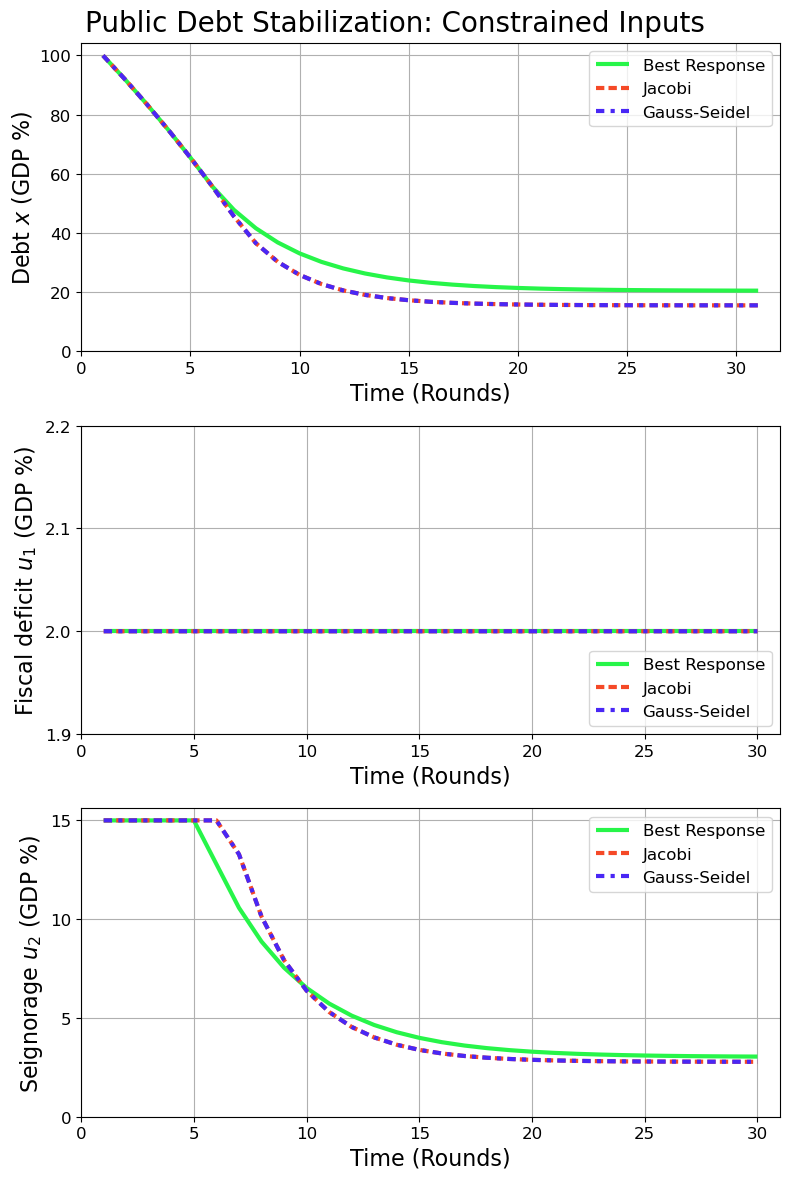

In [14]:
PyPlot.svg(true)

save_files = false #true - save all figures and data / false - do not save

t1 = Array(1:1:Kf+1)
t2 = Array(1:1:Kf)

figure(figsize=(8,12))
subplot(3,1,1)
grid()
plot(t1,100*x_br, linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t1,100*x_jac, linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t1,100*x_gs, linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Best Response", "Jacobi", "Gauss-Seidel"],loc="best",fontsize=12)
ylabel("Debt \$x\$ (GDP %)", fontsize=16)
xlabel("Time (Rounds)", fontsize=16)
xlim(0,Kf+2)
yticks(Array(0:20:100), fontsize=12)
xticks(Array(0:5:Kf), fontsize=12)

subplot(3,1,2)
grid()
plot(t2,100*u_br[1,:], linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t2,100*u_jac[1,:], linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t2,100*u_gs[1,:], linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Best Response", "Jacobi", "Gauss-Seidel"],loc="lower right", fontsize=12)
ylabel("Fiscal deficit \$u_1\$ (GDP %)", fontsize=16)
xlabel("Time (Rounds)", fontsize=16)
xlim(0,Kf+1)
yticks(Array(1.9:0.1:2.2), fontsize=12)
xticks(Array(0:5:Kf), fontsize=12)

subplot(3,1,3)
grid()
plot(t2,100*u_br[2,:], linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t2,100*u_jac[2,:], linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t2,100*u_gs[2,:], linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Best Response", "Jacobi", "Gauss-Seidel"],loc="best", fontsize=12)
ylabel("Seignorage \$u_2\$ (GDP %)", fontsize=16)
xlabel("Time (Rounds)", fontsize=16)
xlim(0,Kf+1)
yticks(Array(0:5:15), fontsize=12)
xticks(Array(0:5:Kf), fontsize=12)

suptitle("Public Debt Stabilization: Constrained Inputs",fontsize=20)
tight_layout() #avoid the overlap of subplots

if save_files
    savefig("scalar_ex_2_constr.eps", bbox_inches="tight")
end

## Risk Premium

In [15]:
α = 0.05;

## Jacobi (QP Problem) - Algorithm 1:

In [16]:
#Initialize arrays
x = zeros(Kf+1) 
x[1] = x_init 

u_osa = zeros(2,Kf) 

u_old = zeros(2)

J1 = Q₁*(x[1] - x_ref)^2 
J2 = Q₂*(x[1] - x_ref)^2 

for k in 1:Kf
    #########
    #Player 1
    
    mP1 = Model(Ipopt.Optimizer)
    set_silent(mP1)
    @variable(mP1, u₁) #control input of the Player 1
    @variable(mP1, xn) #next state

    #Box Constraints
    @constraint(mP1, u1_min <= u₁ <= u1_max)
    
    #Dynamical constraint
    @constraint(mP1, xn == (A + α*x[k])*x[k] + B₁*u₁ + B₂*u_old[2])
    
    #Objective Function
    @objective(mP1, Min, Q₁*(xn - x_ref)^2 + R₁*u₁^2 ) 
    
    optimize!(mP1)
    
    #########
    #Player 2
    
    mP2 = Model(Ipopt.Optimizer)
    set_silent(mP2)
    @variable(mP2, u₂) #control input of the Player 2
    @variable(mP2, xn) #next state 

    #Box Constraints
    @constraint(mP2, u2_min <= u₂ <= u2_max)
    
    #Dynamical constraint
    @constraint(mP2, xn == (A + α*x[k])*x[k] + B₁*u_old[1] + B₂*u₂)
    
    #Monetary Objective Function 
    @objective(mP2, Min, Q₂*(xn - x_ref)^2 + R₂*u₂^2 )
    
    optimize!(mP2)
    
    ########
    #Updates
    
    u_osa[1,k] = JuMP.value.(mP1[:u₁])
    u_osa[2,k] = JuMP.value.(mP2[:u₂])
    
    u_old = u_osa[:,k]
    
    #State simulation
    x[k+1] = (A + α*x[k])*x[k] + B₁*u_osa[1,k] + B₂*u_osa[2,k] 
    
    #Accumulated Objective For Player 1
    J1 += Q₁*(x[k+1] - x_ref)^2 + R₁*u_osa[1,k]^2
    
    #Accumulated Objective For Player 2
    J2 += Q₂*(x[k+1] - x_ref)^2 + R₂*u_osa[2,k]^2
end

u_jac_rp = u_osa
x_jac_rp = x
J1_jac_rp = J1
J2_jac_rp = J2

println("Evolution of the states, x = ", round.(x_jac_rp, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_jac_rp[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_jac_rp[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_jac_rp, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_jac_rp, digits=4))

Evolution of the states, x = [1.0, 0.97, 0.9355, 0.8961, 0.851, 0.7998, 0.7418, 0.6764, 0.6031, 0.5214, 0.4311, 0.3546, 0.2991, 0.259, 0.2302, 0.2096, 0.1948, 0.1843, 0.1768, 0.1715, 0.1677, 0.165, 0.1631, 0.1617, 0.1607, 0.16, 0.1595, 0.1592, 0.1589, 0.1588, 0.1586]

Evolution of the control input of Player 1, u₁ = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

Evolution of the control input of Player 2, u₂ = [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1273, 0.0995, 0.0795, 0.0651, 0.0548, 0.0474, 0.0422, 0.0384, 0.0357, 0.0338, 0.0325, 0.0315, 0.0308, 0.0304, 0.03, 0.0298, 0.0296, 0.0295, 0.0294, 0.0293]

Accumulated Objective (Player 1), J₁(Kf) = 2.1976

Accumulated Objective (Player 2), J₂(Kf) = 3.0138


## Gauss-Seidel (QP Problem) - Algorithm 2:

In [17]:
#Initialize arrays
x = zeros(Kf+1) 
x[1] = x_init 

u_osa = zeros(2,Kf)

u_old = zeros(2)

J1 = Q₁*(x[1] - x_ref)^2 
J2 = Q₂*(x[1] - x_ref)^2 

for k in 1:Kf
    #########
    #Player 1
    
    mP1 = Model(Ipopt.Optimizer)
    set_silent(mP1)
    @variable(mP1, u₁) #control input of Player 1
    @variable(mP1, xn) #next state

    #Box Constraints
    @constraint(mP1, u1_min <= u₁ <= u1_max)
    
    #Dynamical constraint
    @constraint(mP1, xn == (A + α*x[k])*x[k] + B₁*u₁ + B₂*u_old[2])
    
    #Objective Function
    @objective(mP1, Min, Q₁*(xn - x_ref)^2 + R₁*u₁^2 ) 
    
    optimize!(mP1)

    #################
    #Player 1 updates
    u_osa[1,k] = JuMP.value.(mP1[:u₁])
    u_old[1] = u_osa[1,k]
    
    #########
    #Player 2
    
    mP2 = Model(Ipopt.Optimizer)
    set_silent(mP2)
    @variable(mP2, u₂) #control input of Player 2
    @variable(mP2, xn) #next state

    #Box Constraints
    @constraint(mP2, u2_min <= u₂ <= u2_max)
    
    #Dynamical constraint
    @constraint(mP2, xn == (A + α*x[k])*x[k] + B₁*u_old[1] + B₂*u₂)
    
    #Monetary Objective Function 
    @objective(mP2, Min, Q₂*(xn - x_ref)^2 + R₂*u₂^2 )
    
    optimize!(mP2)
    
    #################
    #Player 2 updates
    u_osa[2,k] = JuMP.value.(mP2[:u₂])
    u_old[2] = u_osa[2,k]

    #############
    #State update
    x[k+1] = JuMP.value.(mP2[:xn])

    #############
  
    #Accumulated Objective For Player 1
    J1 += Q₁*(x[k+1] - x_ref)^2 + R₁*u_osa[1,k]^2
    
    #Accumulated Objective For Player 2
    J2 += Q₂*(x[k+1] - x_ref)^2 + R₂*u_osa[2,k]^2
end

u_gs_rp = u_osa
x_gs_rp = x
J1_gs_rp = J1
J2_gs_rp = J2

println("Evolution of the states, x = ", round.(x_gs_rp, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_gs_rp[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_gs_rp[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_gs_rp, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_gs_rp, digits=4))

Evolution of the states, x = [1.0, 0.97, 0.9355, 0.8961, 0.851, 0.7998, 0.7418, 0.6764, 0.6031, 0.5214, 0.4311, 0.3546, 0.2991, 0.259, 0.2302, 0.2096, 0.1948, 0.1843, 0.1768, 0.1715, 0.1677, 0.165, 0.1631, 0.1617, 0.1607, 0.16, 0.1595, 0.1592, 0.1589, 0.1588, 0.1586]

Evolution of the control input of Player 1, u₁ = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

Evolution of the control input of Player 2, u₂ = [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1273, 0.0995, 0.0795, 0.0651, 0.0548, 0.0474, 0.0422, 0.0384, 0.0357, 0.0338, 0.0325, 0.0315, 0.0308, 0.0304, 0.03, 0.0298, 0.0296, 0.0295, 0.0294, 0.0293]

Accumulated Objective (Player 1), J₁(Kf) = 2.1976

Accumulated Objective (Player 2), J₂(Kf) = 3.0138


## Comparison Plots:

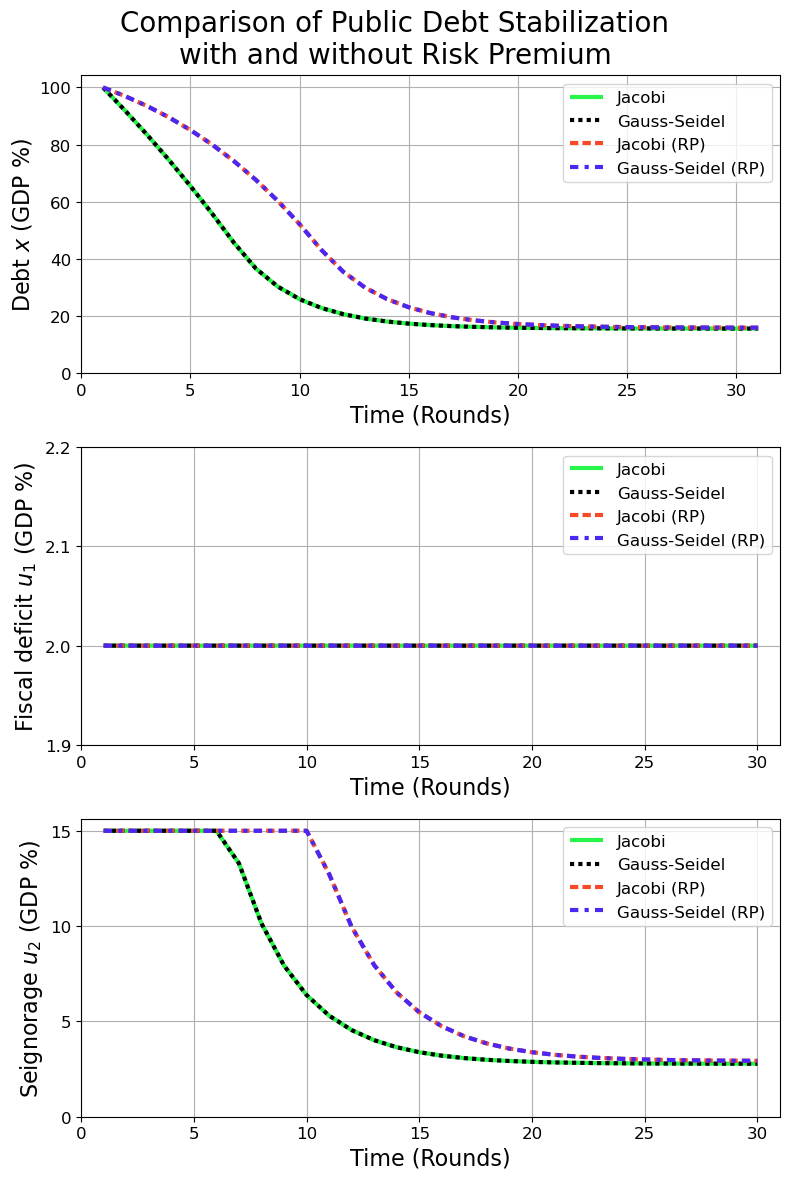

In [18]:
PyPlot.svg(true)

save_files = false #true - save all figures and data / false - do not save

t1 = Array(1:1:Kf+1)
t2 = Array(1:1:Kf)

figure(figsize=(8,12))
subplot(3,1,1)
grid()
plot(t1,100*x_jac, linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t1,100*x_gs, linestyle = (0, (1, 1)), color="#000000", linewidth=3)
plot(t1,100*x_jac_rp, linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t1,100*x_gs_rp, linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Jacobi", "Gauss-Seidel", "Jacobi (RP)", "Gauss-Seidel (RP)"],loc="best", fontsize=12)
ylabel("Debt \$x\$ (GDP %)", fontsize=16)
xlabel("Time (Rounds)", fontsize=16)
xlim(0,Kf+2)
yticks(Array(0:20:100), fontsize=12)
xticks(Array(0:5:Kf), fontsize=12)

subplot(3,1,2)
grid()
plot(t2,100*u_jac[1,:], linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t2,100*u_gs[1,:], linestyle = (0, (1, 1)), color="#000000", linewidth=3)
plot(t2,100*u_jac_rp[1,:], linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t2,100*u_gs_rp[1,:], linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Jacobi", "Gauss-Seidel", "Jacobi (RP)", "Gauss-Seidel (RP)"],loc="best", fontsize=12)
ylabel("Fiscal deficit \$u_1\$ (GDP %)", fontsize=16)
xlabel("Time (Rounds)", fontsize=16)
xlim(0,Kf+1)
yticks(Array(1.9:0.1:2.2), fontsize=12)
xticks(Array(0:5:Kf), fontsize=12)

subplot(3,1,3)
grid()
plot(t2,100*u_jac[2,:], linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t2,100*u_gs[2,:], linestyle = (0, (1, 1)), color="#000000", linewidth=3)
plot(t2,100*u_jac_rp[2,:], linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t2,100*u_gs_rp[2,:], linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Jacobi", "Gauss-Seidel", "Jacobi (RP)", "Gauss-Seidel (RP)"],loc="best", fontsize=12)
ylabel("Seignorage \$u_2\$ (GDP %)", fontsize=16)
xlabel("Time (Rounds)", fontsize=16)
xlim(0,Kf+1)
yticks(Array(0:5:15), fontsize=12)
xticks(Array(0:5:Kf), fontsize=12)

suptitle("Comparison of Public Debt Stabilization\nwith and without Risk Premium",fontsize=20)
tight_layout() #avoid the overlap of subplots

if save_files
    savefig("scalar_ex_2_rp.eps", bbox_inches="tight")
end